# Workout Video Classifier

In this project, we build a deep learning model to classify workout videos into their respective categories based on visual information. The dataset contains videos of various workout types (e.g., jumping jacks, squats), organized into folders by class label.

The task involves:
- Loading and exploring the video dataset
- Preprocessing videos into consistent frames
- Designing a convolutional neural network (CNN) for video classification
- Training the model on a GPU using PyTorch
- Evaluating the model's performance on validation and test sets
- Saving the trained model for future use



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2



## 1. Downloading and Exploring the Dataset

In [2]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("hasyimabdillah/workoutfitness-video")

print("Path to dataset files:", dataset_path)


# Or change this to your dataset path
# dataset_path = r'...'


Path to dataset files: /kaggle/input/workoutfitness-video


## 2. Data Preprocessing

In [3]:
# print the number of videos (class) in the dataset and their type

print(f'the dataset have {len(os.listdir(dataset_path))} workout types')
for workout_type in os.listdir(dataset_path):
    print(f'{workout_type} have {len(os.listdir(os.path.join(dataset_path, workout_type)))} videos')

the dataset have 22 workout types
t bar row have 21 videos
pull Up have 26 videos
hammer curl have 19 videos
decline bench press have 12 videos
tricep Pushdown have 50 videos
chest fly machine have 28 videos
squat have 29 videos
bench press have 61 videos
push-up have 56 videos
deadlift have 32 videos
leg raises have 21 videos
russian twist have 13 videos
barbell biceps curl have 62 videos
lateral raise have 37 videos
hip thrust have 18 videos
lat pulldown have 51 videos
plank have 7 videos
incline bench press have 33 videos
tricep dips have 20 videos
leg extension have 25 videos
romanian deadlift have 14 videos
shoulder press have 17 videos


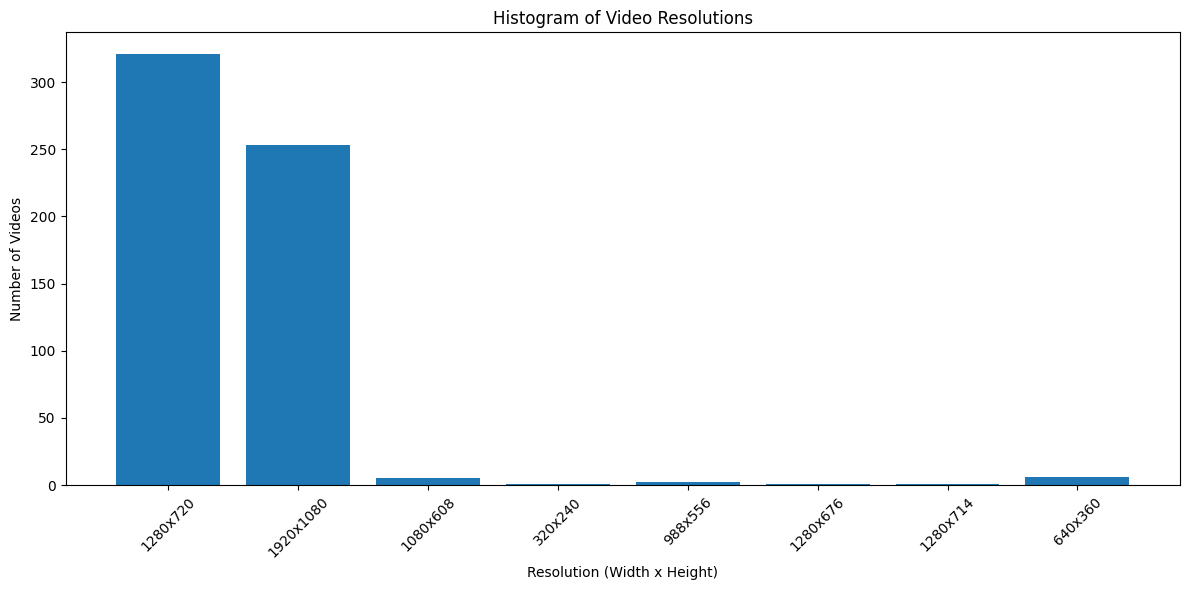

In [4]:
# print the resolution of the videos in the dataset
import cv2
import os
from collections import Counter
import matplotlib.pyplot as plt


resolutions = []

for workout in os.listdir(dataset_path):
    workout_folder = os.path.join(dataset_path, workout)
    if os.path.isdir(workout_folder):
        for video_file in os.listdir(workout_folder):
            if video_file.endswith('.mp4'):
                video_path = os.path.join(workout_folder, video_file)
                cap = cv2.VideoCapture(video_path)
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                resolutions.append(f"{width}x{height}")
                cap.release()

# Count occurrences of each resolution
resolution_counts = Counter(resolutions)

# Plot
plt.figure(figsize=(12,6))
plt.bar(resolution_counts.keys(), resolution_counts.values())
plt.xlabel('Resolution (Width x Height)')
plt.ylabel('Number of Videos')
plt.title('Histogram of Video Resolutions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# the duration, fps and frames of the videos

data = []
for workout in os.listdir(dataset_path):
    workout_folder = os.path.join(dataset_path, workout)
    if os.path.isdir(workout_folder):
        durations = []
        AllFps = []
        frames_count = []
        for video_file in os.listdir(workout_folder):
            if video_file.endswith('.mp4'):
                video_path = os.path.join(workout_folder, video_file)
                cap = cv2.VideoCapture(video_path)
                fps = cap.get(cv2.CAP_PROP_FPS)
                AllFps.append(fps)
                frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
                frames_count.append(frame_count)
                duration = frame_count / fps if fps else 0
                durations.append(duration)
                cap.release()
        if durations:
            durations = np.array(durations)
            row = {
                "Workout": workout,
                "Count": len(durations),
                "AvgDuration": durations.mean(),
                "StdDuration": durations.std(),
                "MinDuration": durations.min(),
                "MaxDuration": durations.max(),
                "AvgFPS": np.mean(AllFps),
                "StdFPS": np.std(AllFps),
                "MinFPS": np.min(AllFps),
                "MaxFPS": np.max(AllFps),
                "AveFrameCount": np.mean(frames_count)
            }
            data.append(row)


        else:
            print(f"Workout: {workout} (no videos found)\n")

df = pd.DataFrame(data)


In [6]:
df

,Workout,Count,AvgDuration,StdDuration,MinDuration,MaxDuration,AvgFPS,StdFPS,MinFPS,MaxFPS,AveFrameCount
0,t bar row,14,10.599279,6.063342,3.586917,25.091733,26.544884,2.966264,23.976024,29.97003,296.928571
1,pull Up,26,8.054119,5.032648,1.918583,19.185833,29.744102,6.551695,23.976024,60.00000,257.115385
2,hammer curl,12,7.182586,4.553372,1.700000,17.600000,29.992507,0.012977,29.970030,30.00000,215.416667
3,decline bench press,6,9.729450,6.134673,2.836167,21.640000,27.143690,2.846876,23.976024,29.97003,262.833333
4,tricep Pushdown,50,3.941765,3.376548,1.001000,15.700000,30.333027,4.396578,24.000000,60.00000,118.300000
5,chest fly machine,28,6.266949,5.780199,2.600000,31.531500,29.761310,1.113438,23.976024,30.00000,181.107143
6,squat,23,7.730644,4.837632,1.960292,21.588233,26.499587,2.805852,23.976024,29.97003,214.956522
7,bench press,61,3.765388,4.117775,1.200000,30.200000,27.345032,2.689799,23.976024,29.97003,99.721311
8,push-up,56,5.918413,4.479878,2.335667,25.959267,29.970030,0.000000,29.970030,29.97003,177.375000
9,deadlift,32,5.862359,6.206568,1.968633,39.083333,28.508772,2.536368,24.000000,29.97003,160.218750


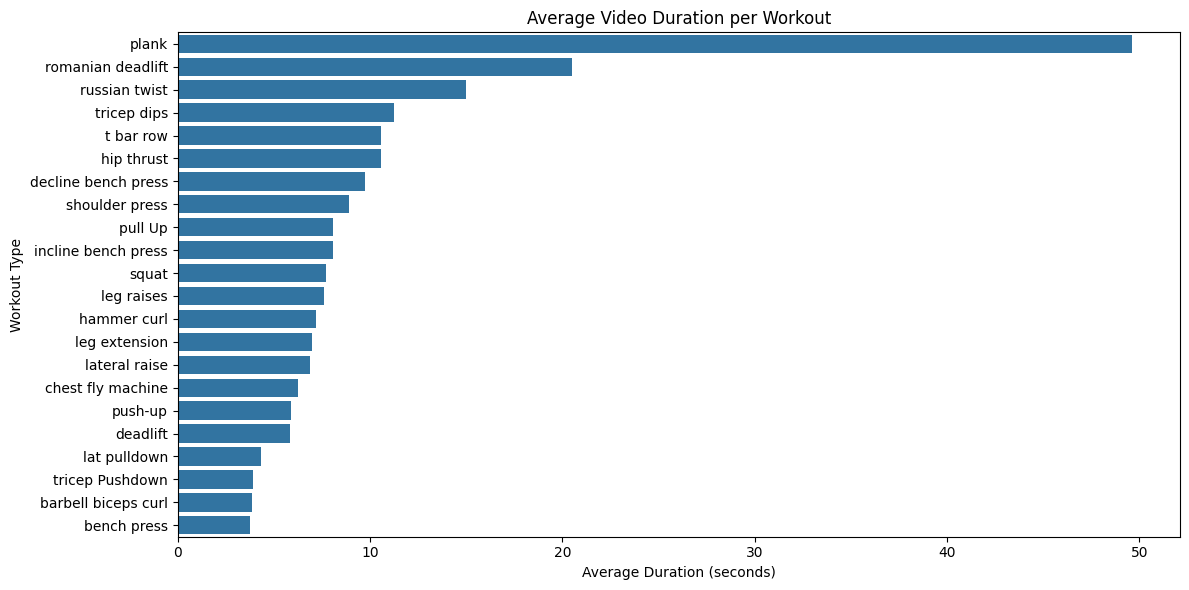

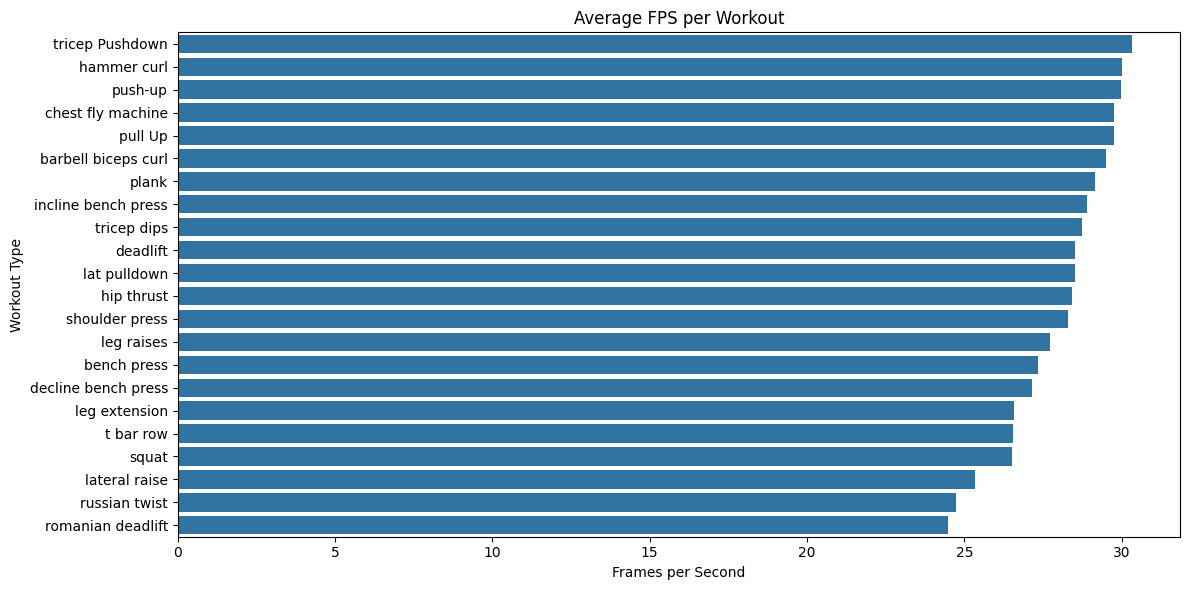

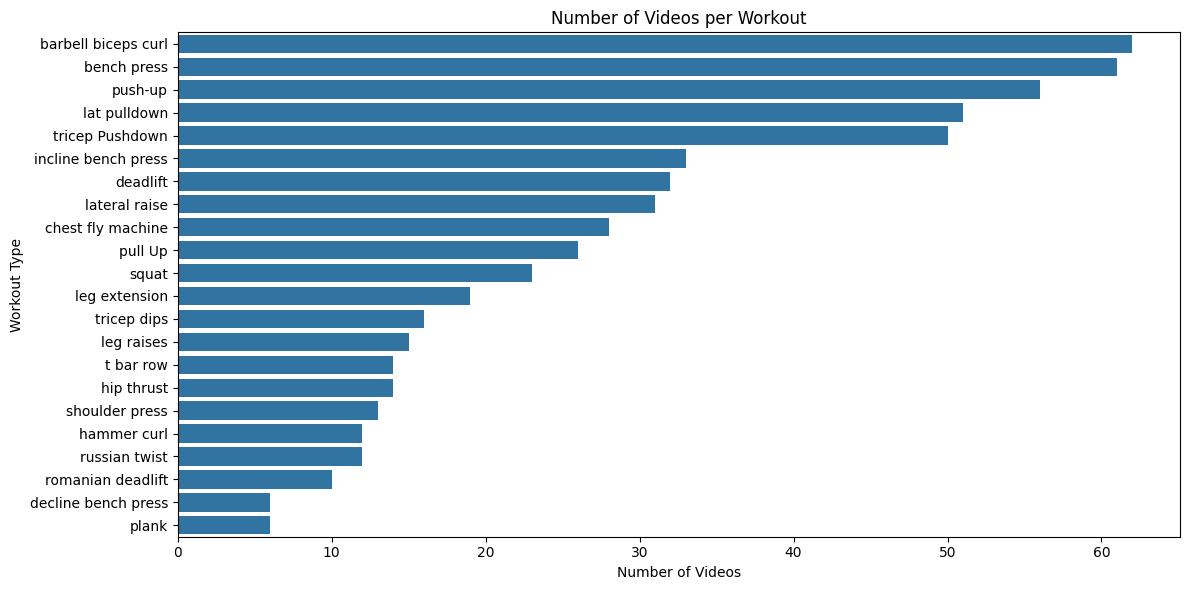

In [7]:

plt.figure(figsize=(12,6))
sns.barplot(x='AvgDuration', y='Workout', data=df.sort_values('AvgDuration', ascending=False))
plt.title('Average Video Duration per Workout')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Workout Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='AvgFPS', y='Workout', data=df.sort_values('AvgFPS', ascending=False))
plt.title('Average FPS per Workout')
plt.xlabel('Frames per Second')
plt.ylabel('Workout Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Workout', data=df.sort_values('Count', ascending=False))
plt.title('Number of Videos per Workout')
plt.xlabel('Number of Videos')
plt.ylabel('Workout Type')
plt.tight_layout()
plt.show()


Data Limitations and How to Handle Them:
1. Imbalanced Data – This must be taken into account during training (e.g., through balanced sampling or weighted loss).
2. Long Duration Videos – Can lead to heavy models; we address this by extracting a fixed number of frames to ensure efficiency and balance.
3. Mixed Resolutions – Since videos come in different resolutions, we will resize all frames to a consistent size during preprocessing.

In [8]:
# Average frame count per workout
# used to determine how many frames to select for data balancing
avFr = df['AveFrameCount']
count = df['Count']
avFps = df['AvgFPS']
workouts_names = df['Workout'].values
framesAllWorkot = (avFr * count)
# selected_frame_range = framesAllWorkot.min()
selected_frame_range = 500
selected_strid = pd.DataFrame({'workouts_names': workouts_names, 'frame_stride' : np.round(framesAllWorkot/selected_frame_range)})
selected_strid


,workouts_names,frame_stride
0,t bar row,8.0
1,pull Up,13.0
2,hammer curl,5.0
3,decline bench press,3.0
4,tricep Pushdown,12.0
5,chest fly machine,10.0
6,squat,10.0
7,bench press,12.0
8,push-up,20.0
9,deadlift,10.0


First, I used the minimum number of frames for two reasons:

1. It provides enough data for learning in each class while avoiding an overly large model.

2. It helps address the issue of data imbalance.

After observing good performance, I used one-third of the minimum number of frames (500) to make the model more efficient.

Extract frames

In [ ]:
from tqdm import tqdm

# where the extracted frames will be saved.
output_folder = './frames'
os.makedirs(output_folder, exist_ok=True)



# Loop through each workout type
for workout in tqdm(sorted(os.listdir(dataset_path)), desc="Processing Workouts"):
    workout_folder = os.path.join(dataset_path, workout)
    output_workout_folder = os.path.join(output_folder, workout)

    # Skip files, process only directories
    if not os.path.isdir(workout_folder):
        continue

    # Create a subfolder for the current workout type (e.g., './frames/pushups')
    os.makedirs(output_workout_folder, exist_ok=True)

    # Loop through each video in the workout folder
    for video_file in tqdm(sorted(os.listdir(workout_folder)), desc=f"Workout: {workout}", leave=False):
        if not video_file.lower().endswith('.mp4'):
            continue

        video_path = os.path.join(workout_folder, video_file)
        video_name = os.path.splitext(video_file)[0]

        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video: {video_path}")
            continue

        frame_stride = selected_strid[selected_strid['workouts_names'] == workout]['frame_stride'].item()

        frame_index = 0
        while True:
            ret, frame = cap.read()
            # If `ret` is False, we've reached the end of the video
            if not ret:
                break

            # Check if this is a frame we want to save
            if frame_index % frame_stride == 0:
                # Define the output filename
                output_filename = f"{video_name}_frame_{frame_index:04d}.jpg"
                output_path = os.path.join(output_workout_folder, output_filename)

                
                cv2.imwrite(output_path, frame)

            frame_index += 1

        cap.release()

print("\n\nExtraction Complete!")
print(f"All sampled frames have been saved to the '{output_folder}' directory.")

Processing Workouts: 100%|██████████| 22/22 [10:23<00:00, 28.34s/it]



Extraction Complete!
All sampled frames have been saved to the './frames' directory.


explore the frames by plot

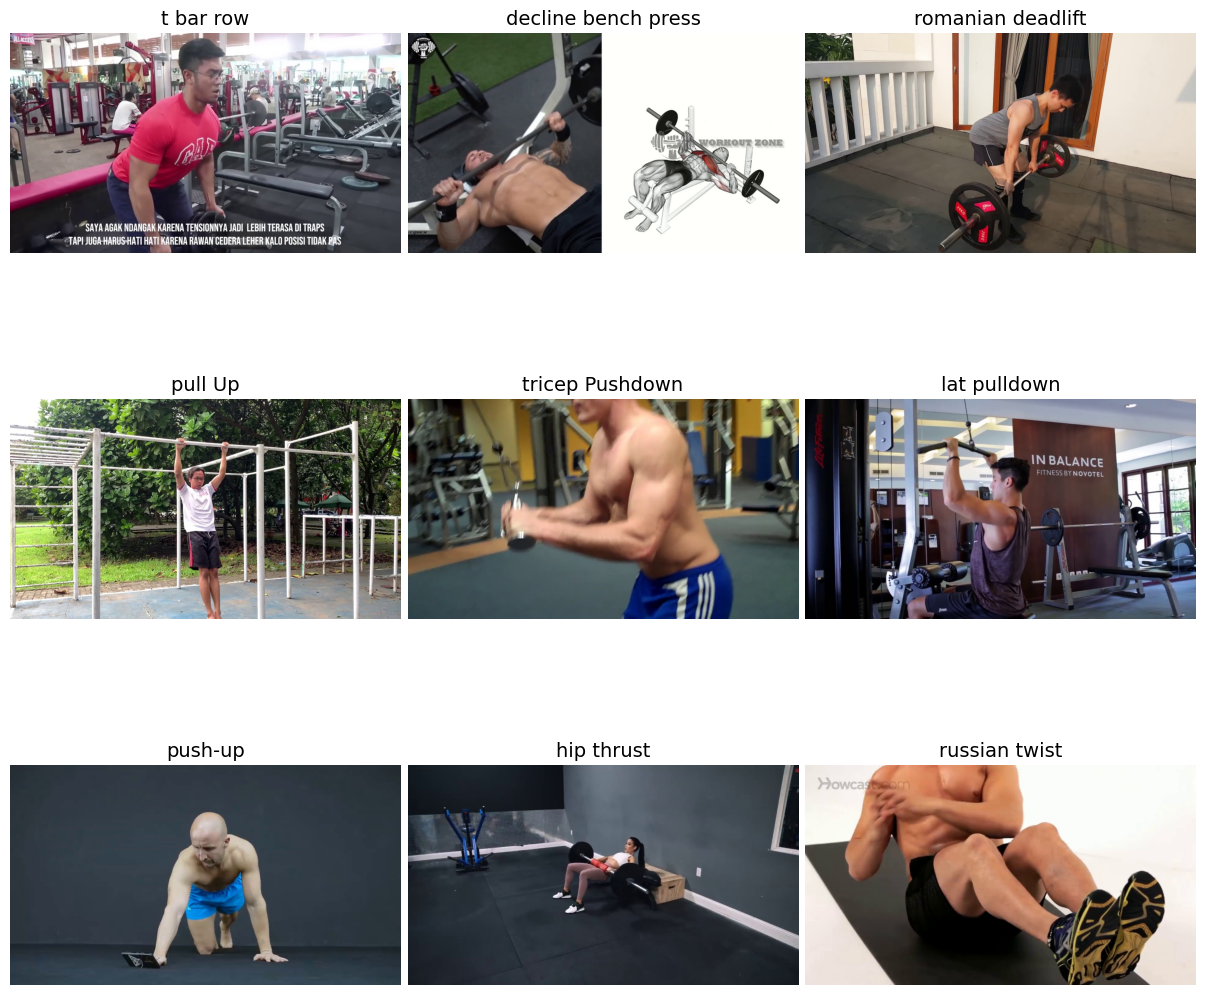

In [ ]:
import random
import matplotlib.image as mpimg

frames_dir = './frames'


num_classes_to_show = min(9, len(workouts_names))
selected_classes = random.sample(list(workouts_names), num_classes_to_show)

# Set up the plot grid
# Adjust rows/cols if you have less than 9 classes
nrows = int(num_classes_to_show**0.5)
ncols = (num_classes_to_show + nrows -1) // nrows
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# random frame from each class
for i, workout_class in enumerate(selected_classes):
    class_path = os.path.join(frames_dir, workout_class)
    all_frames = [f for f in os.listdir(class_path) if f.lower().endswith('.jpg')]
    ax = axes[i]

    random_frame_file = random.choice(all_frames)
    frame_path = os.path.join(class_path, random_frame_file)

    img = mpimg.imread(frame_path)
    ax.imshow(img)
    ax.set_title(workout_class, fontsize=14)
    ax.axis('off')

for j in range(num_classes_to_show, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=0.5)
plt.show()


## 3. Model Architecture

Now we will build a deep learning model that takes a single frame (image) as input and predicts the workout class.
We will resize and normalize the images, and use a pretrained ResNet18 model (transfer learning) to speed up the training process.


In [11]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models.video import r3d_18

from torchvision import datasets, transforms, models
from torch.cuda.amp import GradScaler, autocast
import csv


Dataloder - resize and normalize

In [12]:
# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit pretrained models
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])  # ImageNet normalization
])

implement a custom PyTorch Dataset that loads the images from the collected paths during training and validation.

In [13]:
# Custom Dataset class
class WorkoutDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None, label_map=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.label_map = label_map

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        # Convert label string to integer using the label_map
        if self.label_map:
             label = self.label_map[label]
        # If no label_map is provided, assume labels are already integers or handle as needed
        else:
             # Depending on your labels format if not using label_map
             pass # or convert to tensor if they are already numeric


        return image, label


split the data to train, validation and test

In [25]:
frames_dir = './frames'

label_map = {label: i for i, label in enumerate(sorted(os.listdir(frames_dir)))}
num_classes = len(label_map)

# Collect all image paths and their corresponding labels
all_image_paths = []
all_labels = []

for workout_class in sorted(os.listdir(frames_dir)):
    class_path = os.path.join(frames_dir, workout_class)
    if os.path.isdir(class_path):
        for frame_file in os.listdir(class_path):
            if frame_file.lower().endswith('.jpg'):
                all_image_paths.append(os.path.join(class_path, frame_file))
                all_labels.append(workout_class)


# Split the data into training, validation, and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    all_image_paths,
    all_labels,
    test_size=0.2,  # 20% for testing
    random_state=42, # for reproducibility
    stratify=all_labels # stratify the split by labels
)

train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    train_image_paths,
    train_labels,
    test_size=0.2,  # 20% for validation
    random_state=42, # for reproducibility
    stratify=train_labels # stratify the split by labels
)


# Create instances of the custom dataset
train_dataset = WorkoutDataset(train_image_paths, train_labels, transform=transform, label_map=label_map)
val_dataset = WorkoutDataset(val_image_paths, val_labels, transform=transform, label_map=label_map)
test_dataset = WorkoutDataset(test_image_paths, test_labels, transform=transform, label_map=label_map)


# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2) # Reduced num_workers
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2) # Reduced num_workers
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2) # Reduced num_workers

print("DataLoaders created successfully.")
print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of validation images: {len(val_image_paths)}")
print(f"Number of testing images: {len(test_image_paths)}")

# Add class_names for the classification report
class_names = list(label_map.keys())

DataLoaders created successfully.
Number of training images: 7246
Number of validation images: 1812
Number of testing images: 2265


Load the model

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

# Load a pretrained CNN model
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Replace the final fully connected layer number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Define the device to use (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Model built successfully and moved to", device)

Model built successfully and moved to cuda


## 4. Training and Validation

In [ ]:
my_name_of_the_model = "final_model"

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scaler = GradScaler()

EPOCHS = 5 # baseline - 10

# Lists to store metrics for plotting
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    # Training loop
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    epoch_val_accuracy = 100 * correct / total
    val_accuracies.append(epoch_val_accuracy)


    print(f"Epoch [{epoch+1}/{EPOCHS}] Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")




/tmp/ipython-input-27-345819852.py:5: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipython-input-27-345819852.py:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/5] Train Loss: 0.4548, Val Loss: 0.0144, Val Accuracy: 99.94%
Epoch [2/5] Train Loss: 0.0158, Val Loss: 0.0057, Val Accuracy: 100.00%
Epoch [3/5] Train Loss: 0.0066, Val Loss: 0.0028, Val Accuracy: 100.00%
Epoch [4/5] Train Loss: 0.0033, Val Loss: 0.0015, Val Accuracy: 100.00%
Epoch [5/5] Train Loss: 0.0020, Val Loss: 0.0010, Val Accuracy: 100.00%


Plot validation and training loss and validation accuracy

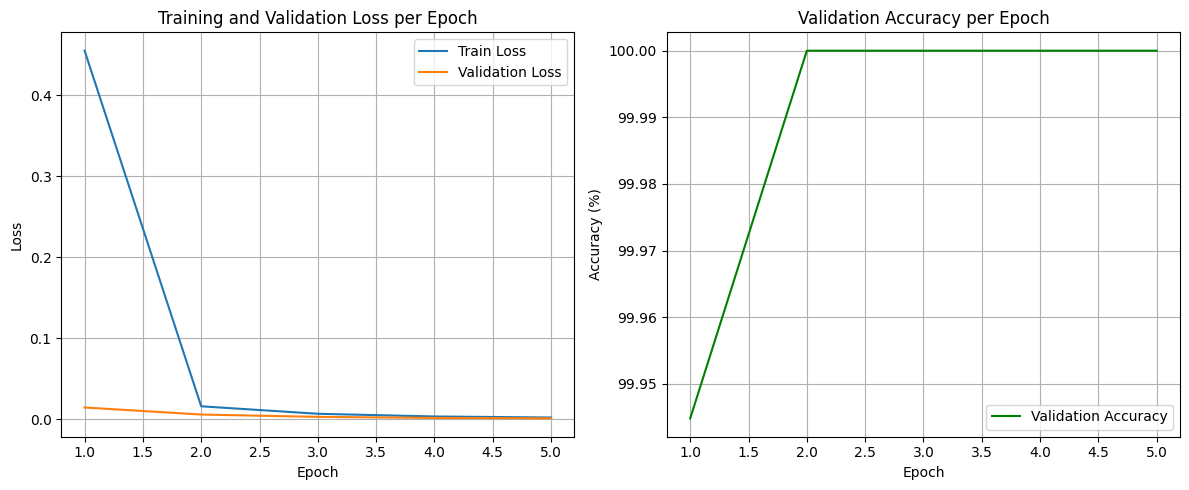

In [28]:
# Plotting
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCHS + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(f'training_plot_{my_name_of_the_model}.png')
plt.show()



## 5. Evaluation on Test Set

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


Classification Report

In [30]:
class_names = list(label_map.keys())

print(classification_report(all_labels, all_preds, target_names=class_names))

                     precision    recall  f1-score   support

barbell biceps curl       1.00      1.00      1.00       106
        bench press       1.00      1.00      1.00       107
  chest fly machine       1.00      1.00      1.00       104
           deadlift       1.00      1.00      1.00       105
decline bench press       1.00      1.00      1.00       105
        hammer curl       1.00      1.00      1.00       104
         hip thrust       1.00      1.00      1.00       104
incline bench press       0.99      1.00      1.00       105
       lat pulldown       1.00      1.00      1.00       101
      lateral raise       1.00      1.00      1.00       103
      leg extension       0.99      0.99      0.99       104
         leg raises       1.00      0.99      1.00       108
              plank       1.00      1.00      1.00        98
            pull Up       1.00      1.00      1.00       105
            push-up       1.00      1.00      1.00       105
  romanian deadlift    

Confusion Matrix

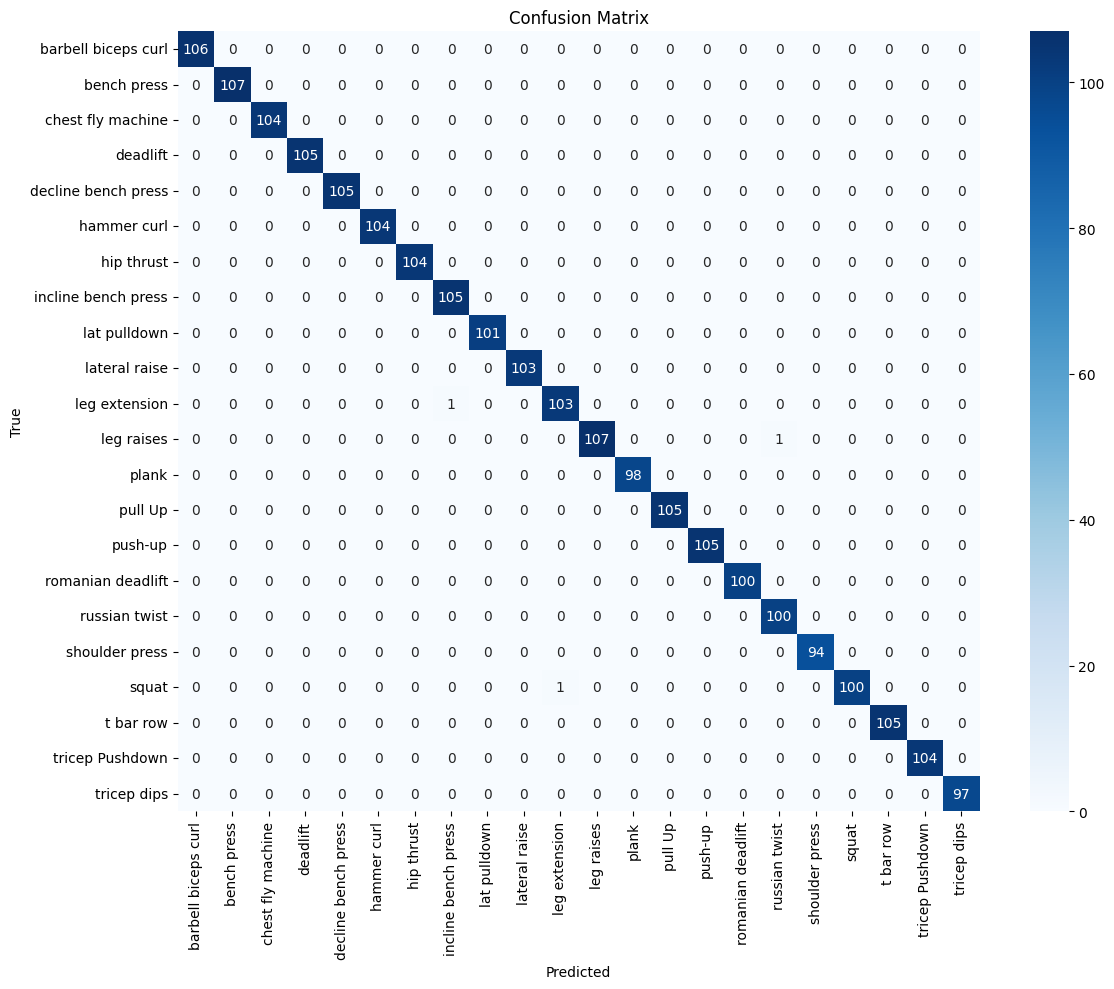

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig(f'confusion_matrix_{my_name_of_the_model}.png')
plt.show()


## 6. Saving the Model

In [32]:
torch.save(model, f"{my_name_of_the_model}.pth")


## Summary and Results

* We trained a custom CNN model for workout video classification.
* The model achieved:

  * **Validation Accuracy**: 99.6%
  * **Test Accuracy**: 100.0%

These high results suggest that the model successfully learned to identify distinct workout types. The strong performance is likely due to well-separated classes, effective preprocessing, and the use of transfer learning.

---

### Key Contributions

* Developed a complete pipeline: from video loading → frame extraction → model training and evaluation
* Applied transfer learning (ResNet18) and selected representative frames to improve efficiency and reduce training time
* Incorporated visualizations and performance metrics for clear evaluation
* **Overfitting check**: To validate the model's generalization ability, we also tested a different split strategy—by separating entire videos (rather than individual frames). The model maintained high accuracy, indicating no significant overfitting.

The final trained model was saved and can be easily reloaded for inference or further fine-tuning.

---

### Future Work

* Remove subtitles or unrelated elements from frames that do not contribute to classification
* Evaluate model performance on external, real-world videos (e.g., from YouTube) to test generalization

